### Producing novel_utron saturation plots of assembled UTRons from the simulations 

- Opens databases corresponding to random groupings of samples
- (e.g.) (10.1, 10.2, 10.3) are three repeats using 10 random samples



Function below counts the number of utrons in the dataframe returned from the query.
- Database name corresponds to the no. of samples assembled 

Function accepts a "num"
- (if num = 1 )   = returns number of transcripts assembled
- (if num = 2)    = returns number of genes with assembled utrons

In [5]:
import pandas as pd
import sqlite3
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/mba13ns/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
def count_utrons(database, num):
    cnx = sqlite3.connect(database)
    cnx.execute("ATTACH '/shared/sudlab1/General/annotations/hg38_noalt_ensembl85/csvdb' as annotations")
    if num == 1:
        query_text1 = '''
        SELECT * 
        FROM novel_utrons_ids 
        WHERE track='agg-agg-agg' AND transcript_id like "MSTRG%"
        ORDER BY transcript_id'''
    if num == 2:
        query_text1 = '''
        SELECT * 
        FROM novel_utrons_ids AS uid
        INNER JOIN annotations.transcript_info AS ti
        ON ti.transcript_id = match_transcript_id
        WHERE track='agg-agg-agg' AND uid.transcript_id like "MSTRG%"
        GROUP BY gene_name
        ORDER BY transcript_id
        '''
    
    query1 = pd.read_sql_query(query_text1, cnx)
    num = query1.shape[0]
    return num

In [7]:
# Names of the database name to be opened

db_list = ["1.1", "1.2","1.3","1.4","1.5","1.6",
           "10.1", "10.2", "10.3",
           "20.1", "20.2", "20.3",
           "30.1", "30.2", "30.3", 
           "40.1", "40.2", "40.3",
           "50.1", "50.2", "50.3",
           "55.1", "55.2", "55.3",
           "60"]


# Number of repeeats in each database (for plotting later)
num_samples = [1]*6 + [10]*3 + [20]*3 + [30]*3 + [40]*3 + [50]*3 + [55]*3 + [60]

In [8]:
# Get utron counts for each database (transcript count)
utron_counts =[]
for db in db_list:
    db_name = "/shared/sudlab1/General/projects/utrons_project/Simulations/Saturation/"+db+".db"
    a=count_utrons(db_name, 1)
    utron_counts.append(a)
    
# Get utron counts for each database (gene count)    
utron_counts2 =[]
for db in db_list:
    db_name = "/shared/sudlab1/General/projects/utrons_project/Simulations/Saturation/"+db+".db"
    a=count_utrons(db_name, 2)
    utron_counts2.append(a)

In [9]:
# Find means for each set of repeats

# Transcript means
means = []
means.append(sum(utron_counts[0:6])/6.0);    means.append(sum(utron_counts[6:9])/3.0)
means.append(sum(utron_counts[9:12])/3.0);   means.append(sum(utron_counts[12:15])/3.0);
means.append(sum(utron_counts[15:18])/3.0);  means.append(sum(utron_counts[18:21])/3.0)
means.append(sum(utron_counts[21:24])/3.0);  means.append(sum(utron_counts[24])/1.0)

# Gene level means
means2 = []
means2.append(sum(utron_counts2[0:6])/6.0);    means2.append(sum(utron_counts2[6:9])/3.0)
means2.append(sum(utron_counts2[9:12])/3.0);   means2.append(sum(utron_counts2[12:15])/3.0)
means2.append(sum(utron_counts2[15:18])/3.0);  means2.append(sum(utron_counts2[18:21])/3.0)
means2.append(sum(utron_counts2[21:24])/3.0);  means2.append(sum(utron_counts2[24])/1.0)

#x-axis values for plotting
plotlist = [1,10,20,30,40,50,55,60]

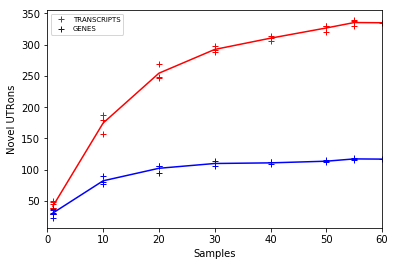

In [18]:
# Transcript counts
pylab.plot(num_samples, utron_counts, '+', label="TRANSCRIPTS", color='r')

# Gene counts
pylab.plot(num_samples, utron_counts2, '+', label='GENES', color='b')

# Means
pylab.plot(plotlist, means, color='r')
pylab.plot(plotlist, means2, color='b')


pylab.legend(loc=2, fontsize="x-small")
pylab.xlabel('Samples'); pylab.ylabel('Novel UTRons')
pylab.xlim(0,60)
pylab.savefig("./images/5_SaturationCurve", dpi=300)

In [17]:
####################################
# LIST OF GENES WITH UTRONS IN THEM 
#####################################

cnx = sqlite3.connect("/shared/sudlab1/General/projects/utrons_project/Simulations/Saturation/55.2.db")
cnx.execute("ATTACH '/shared/sudlab1/General/annotations/hg38_noalt_ensembl85/csvdb' as annotations")

query_text1 = '''
        SELECT * 
        FROM novel_utrons_ids AS uid
        INNER JOIN annotations.transcript_info AS ti
        ON ti.transcript_id = match_transcript_id
        WHERE track='agg-agg-agg' AND uid.transcript_id like "MSTRG%"
        GROUP BY gene_name
        ORDER BY transcript_id
        '''
    
query1 = pd.read_sql_query(query_text1, cnx)
a = query1["gene_name"].tolist()
outfile = open("/shared/sudlab1/General/projects/utrons_project/misc_files/systematicUtronGenes.txt", 'w')
for line in sorted(a):
    line = line + "\n"
    outfile.write(line)
outfile.close()